# **EDA y Preprocesamiento - Telco Churn MLOps**

### **Diccionario de Variables:**

*   **customerID**
    *   **Descripción:** ID único que identifica a cada cliente.
    *   **Tipo:** Identificador
*   **gender**
    *   **Descripción:** Género del cliente.
    *   **Tipo:** Categórica (Binaria)
*   **SeniorCitizen**
    *   **Descripción:** Indica si el cliente es una persona mayor (1) o no (0).
    *   **Tipo:** Categórica (Binaria)
*   **Partner**
    *   **Descripción:** Indica si el cliente tiene pareja (Yes/No).
    *   **Tipo:** Categórica (Binaria)
*   **Dependents**
    *   **Descripción:** Indica si el cliente tiene dependientes económicos (Yes/No).
    *   **Tipo:** Categórica (Binaria)
*   **tenure**
    *   **Descripción:** Número de meses que el cliente ha permanecido en la compañía.
    *   **Tipo:** Numérica
*   **PhoneService**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio telefónico (Yes/No).
    *   **Tipo:** Categórica (Binaria)
*   **MultipleLines**
    *   **Descripción:** Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service).
    *   **Tipo:** Categórica
*   **InternetService**
    *   **Descripción:** Proveedor de servicios de internet del cliente (DSL, Fiber optic, No).
    *   **Tipo:** Categórica
*   **OnlineSecurity**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio de seguridad online (Yes/No/No internet service).
    *   **Tipo:** Categórica
*   **OnlineBackup**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio de respaldo en línea (Yes/No/No internet service).
    *   **Tipo:** Categórica
*   **DeviceProtection**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio de protección de dispositivos (Yes/No/No internet service).
    *   **Tipo:** Categórica
*   **TechSupport**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio de soporte técnico (Yes/No/No internet service).
    *   **Tipo:** Categórica
*   **StreamingTV**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio de streaming de TV (Yes/No/No internet service).
    *   **Tipo:** Categórica
*   **StreamingMovies**
    *   **Descripción:** Indica si el cliente tiene contratado el servicio de streaming de películas (Yes/No/No internet service).
    *   **Tipo:** Categórica
*   **Contract**
    *   **Descripción:** El tipo de contrato del cliente (Month-to-month, One year, Two year).
    *   **Tipo:** Categórica
*   **PaperlessBilling**
    *   **Descripción:** Indica si el cliente ha activado la facturación electrónica sin papel (Yes/No).
    *   **Tipo:** Categórica (Binaria)
*   **PaymentMethod**
    *   **Descripción:** El método de pago utilizado por el cliente.
    *   **Tipo:** Categórica
*   **MonthlyCharges**
    *   **Descripción:** El monto cobrado al cliente mensualmente.
    *   **Tipo:** Numérica
*   **TotalCharges**
    *   **Descripción:** El monto total cobrado al cliente desde el inicio del servicio.
    *   **Tipo:** Numérica
*   **Churn**
    *   **Descripción:** La variable objetivo. Indica si el cliente abandonó el servicio (Yes/No).
    *   **Tipo:** Objetivo (Target)

## 1. Configuración e Importación

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Carga y Exploración Inicial

In [3]:
df = pd.read_csv('../data/telco_churn.csv')
print("Shape del dataset:", df.shape)
df.head()

Shape del dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


El dataset contiene 7,043 registros de clientes con 21 variables que describen características demográficas, servicios contratados, información de cuenta y la variable objetivo Churn.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


La información del dataset revela que la mayoría de las variables son de tipo objeto (categóricas), representando servicios y características del cliente como tipo de internet, contrato, método de pago y servicios adicionales.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Las estadísticas descriptivas muestran que la antigüedad de los clientes (tenure) varía considerablemente, desde clientes nuevos hasta aquellos con más de 70 meses de permanencia, con una media de 32 meses. Los cargos mensuales (MonthlyCharges) tienen un rango amplio entre $18.25 y $118.75, con una media de $64.76, reflejando diferentes niveles de servicios contratados. Los cargos totales (TotalCharges) muestran alta variabilidad, indicando diferencias significativas en el valor acumulado de los clientes.

In [6]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Las variables categóricas muestran distribuciones relativamente balanceadas en género y servicios básicos. Se observa que la mayoría de clientes tienen servicios telefónicos contratados, mientras que los servicios de internet se distribuyen entre DSL, fibra óptica y sin servicio. Los contratos mes a mes son los más frecuentes, lo cual puede estar asociado a mayor flexibilidad pero también a mayor riesgo de churn. Los métodos de pago electrónicos son predominantes, y aproximadamente el 26% de los clientes han abandonado el servicio.

In [7]:
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de valores nulos:")
print((df.isnull().sum() / len(df) * 100).round(2))

Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Porcentaje de valores nulos:
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges

La inspección de valores nulos mustra al menos que por el momento no el dataset esta completo.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print("Valores nulos después del manejo:")
print(df.isnull().sum().sum())

Valores nulos después del manejo:
0


## 3. Análisis Exploratorio de Datos (EDA) Visual

### 3.1 Análisis Univariado - Variables Numéricas

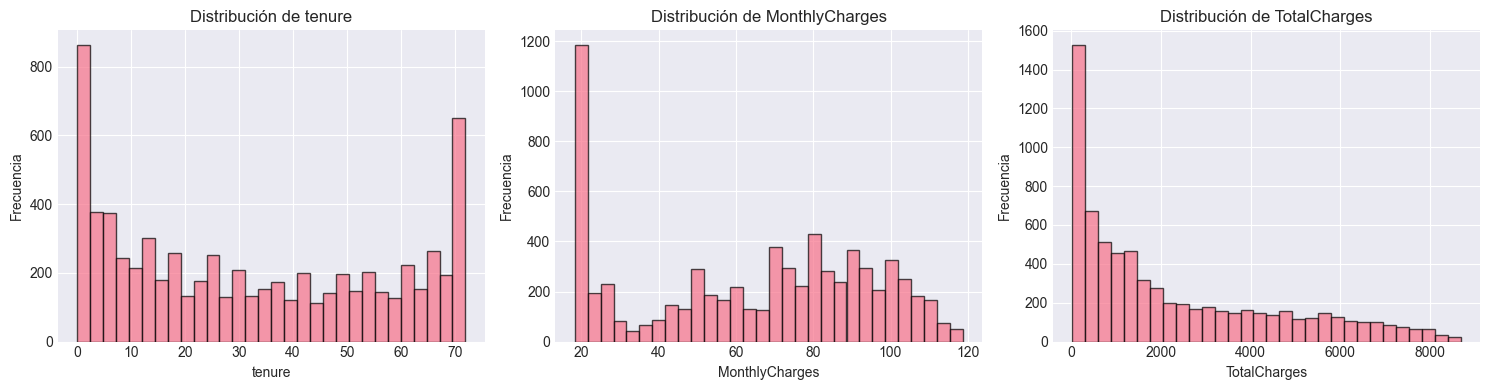

In [9]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Las distribuciones de las variables numéricas revelan patrones importantes para la retención de clientes. La variable tenure muestra una distribución bimodal, con picos en clientes muy nuevos y en clientes con alta antigüedad, lo que sugiere que el riesgo de churn puede ser mayor en las etapas iniciales de la relación con el cliente. MonthlyCharges presenta una distribución desigual con un pico en 20 siendo la moda. TotalCharges muestra una distribución asimétrica hacia valores bajos, consistente con una base de clientes donde muchos son relativamente recientes. Estos patrones son fundamentales para diseñar estrategias de retención diferenciadas según la antigüedad y el nivel de gasto del cliente.

### 3.2 Análisis Univariado - Variables Categóricas

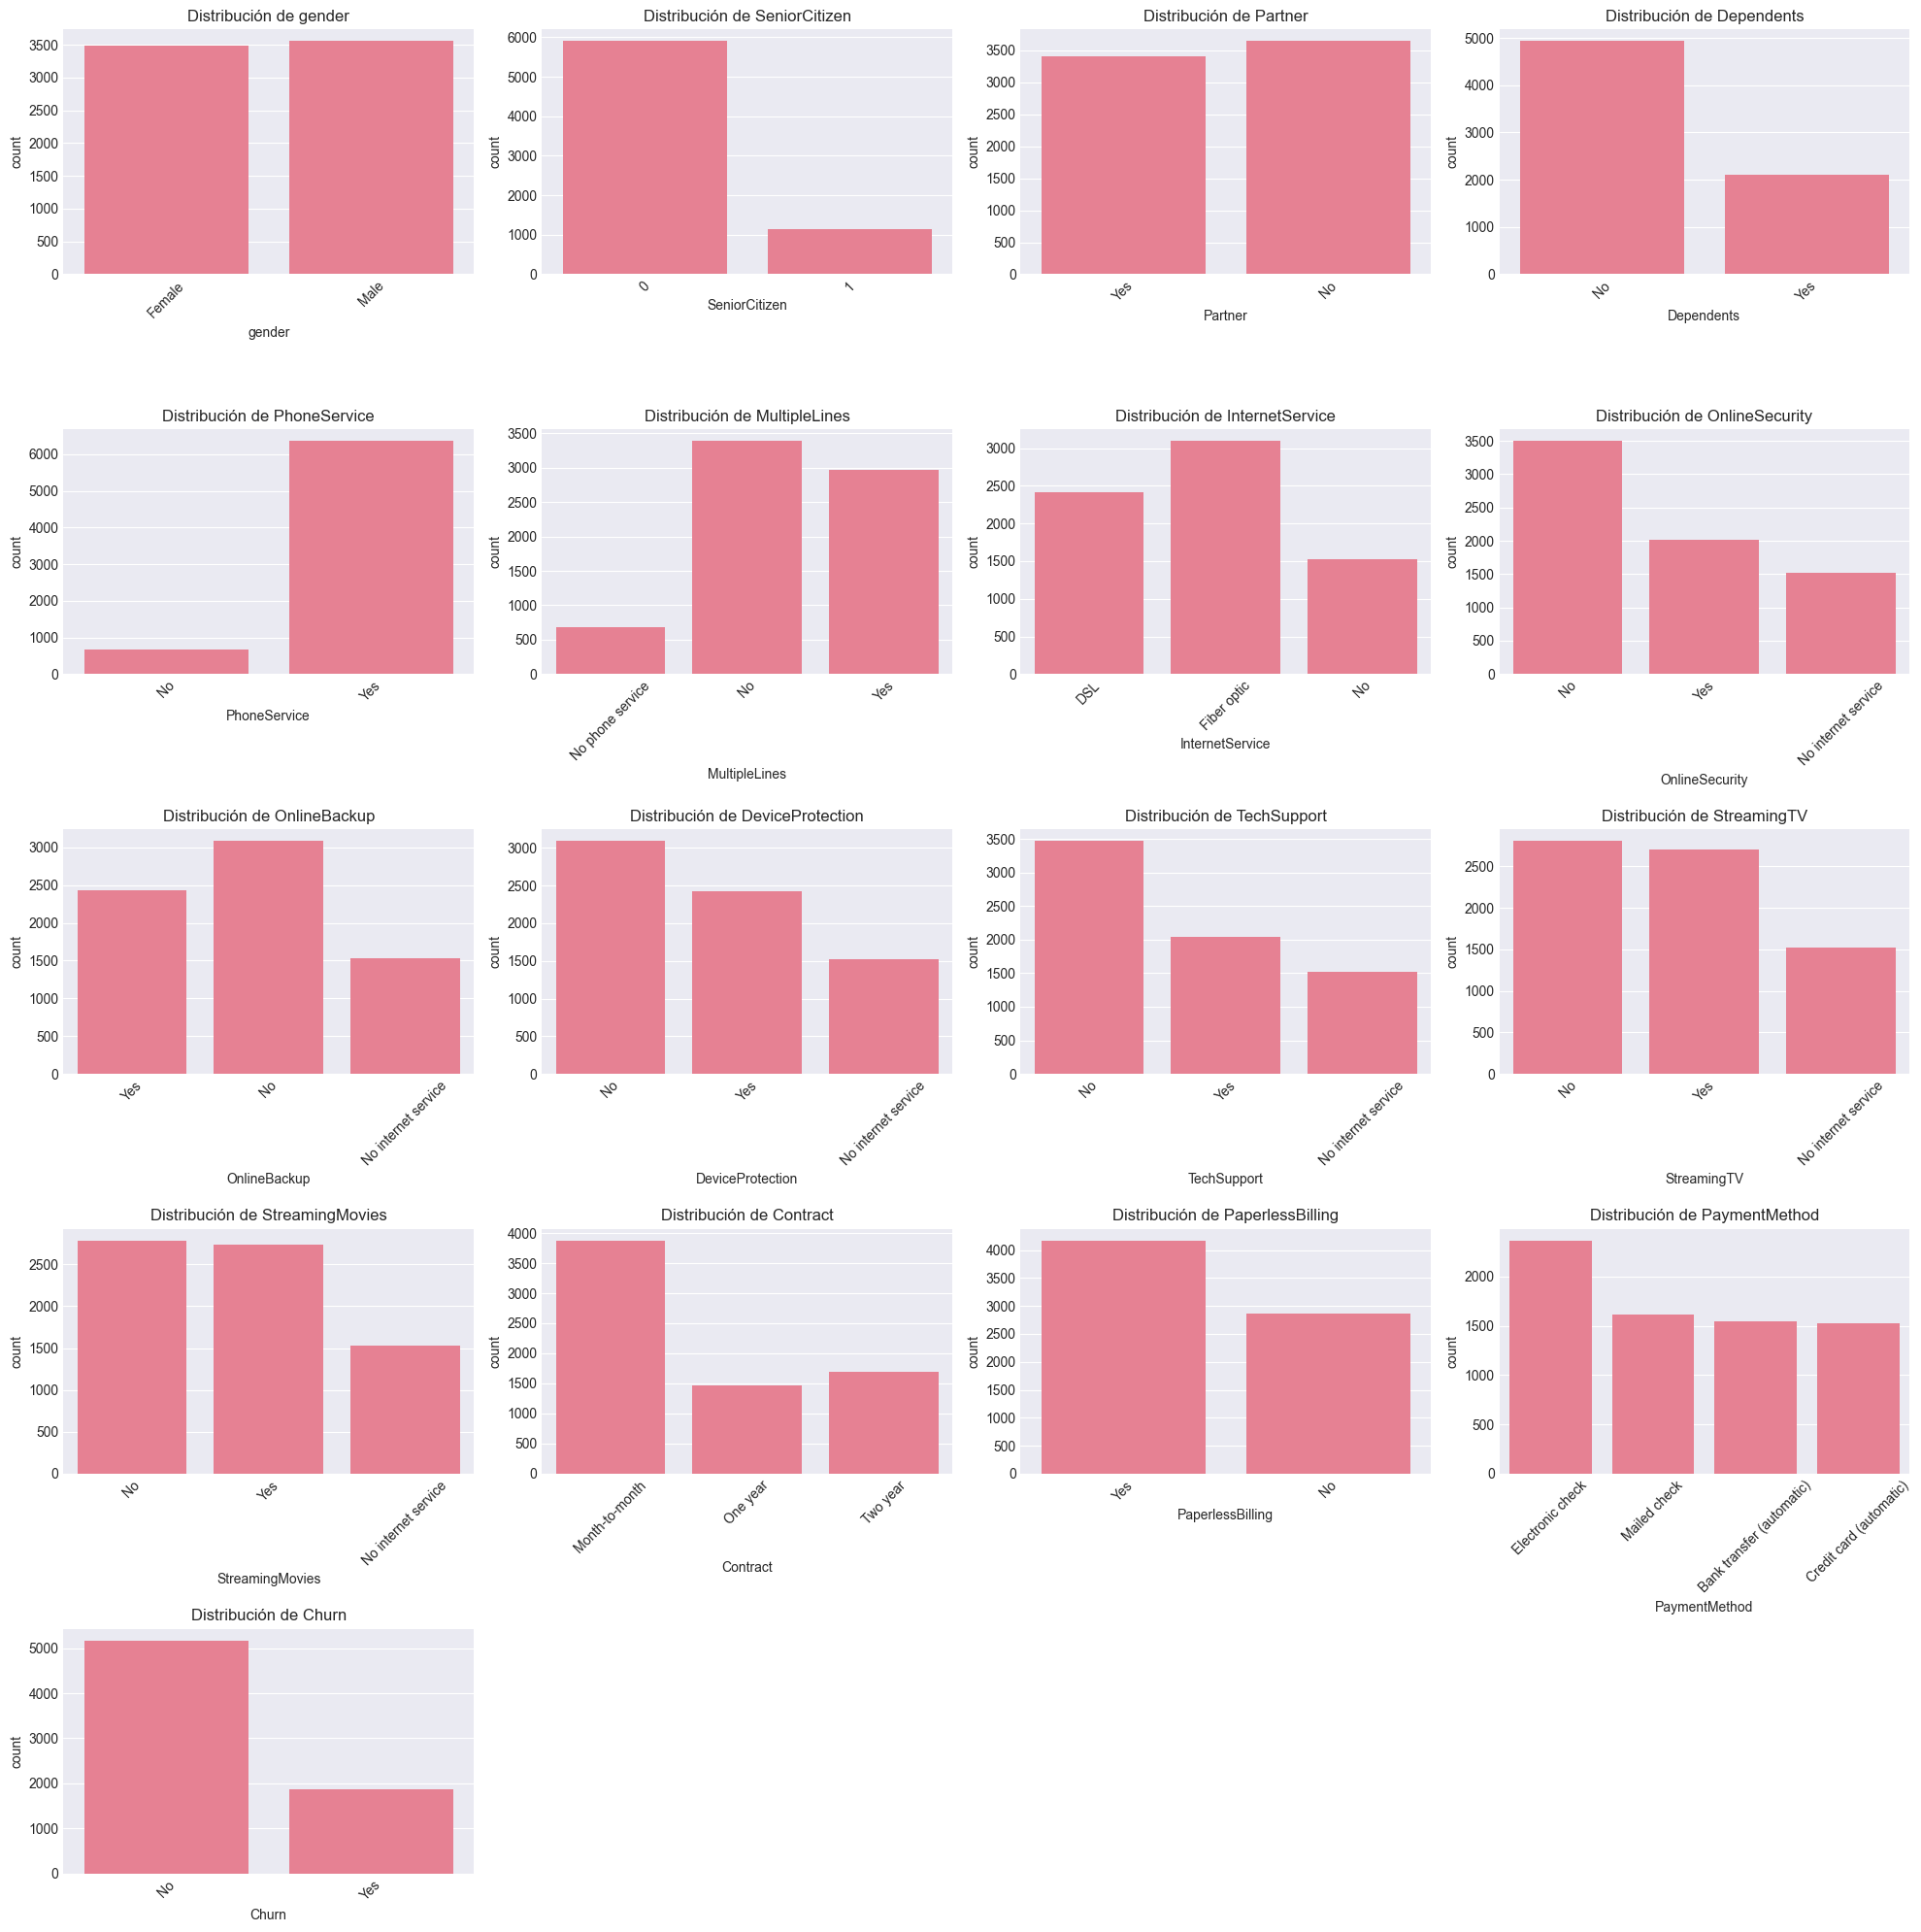

In [10]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

A partir de los gráficos de barras, se pueden extraer las siguientes observaciones clave sobre la composición de la base de clientes:

*   **Balance de la Variable Objetivo (Churn):** El conjunto de datos está desbalanceado. La mayoría de los clientes (`~5000`) no han abandonado el servicio ("No"), mientras que una minoría (`~2000`) sí lo ha hecho ("Yes"). Esto es crucial para la etapa de modelado, ya que la métrica de accuracy puede ser engañosa.

*   **Perfil Demográfico:**
    *   La distribución de género es prácticamente equitativa (50/50).
    *   La gran mayoría de los clientes no son personas mayores (`SeniorCitizen` = 0).
    *   El número de clientes con y sin pareja (`Partner`) es similar, pero hay una mayor proporción de clientes sin dependientes (`Dependents`).

*   **Contratos y Facturación:**
    *   El tipo de contrato **Month-to-month** es, con diferencia, el más común, superando ampliamente a los contratos de uno y dos años. Esto podría ser un indicador clave de churn, ya que ofrece menos compromiso.
    *   La mayoría de los clientes utilizan facturación sin papel (`PaperlessBilling`).
    *   El método de pago más frecuente es el cheque electrónico (`Electronic check`).

*   **Servicios Contratados:**
    *   Casi todos los clientes tienen servicio telefónico (`PhoneService`).
    *   El servicio de internet más popular es el de **fibra óptica (`Fiber optic`)**, seguido de DSL.
    *   Para la mayoría de los servicios adicionales (como `OnlineSecurity`, `OnlineBackup`, `TechSupport`, etc.), la respuesta más común es "No", lo que indica que una gran parte de los clientes solo contrata los servicios básicos.

### 3.3 Análisis Multivariado - Matriz de Correlación

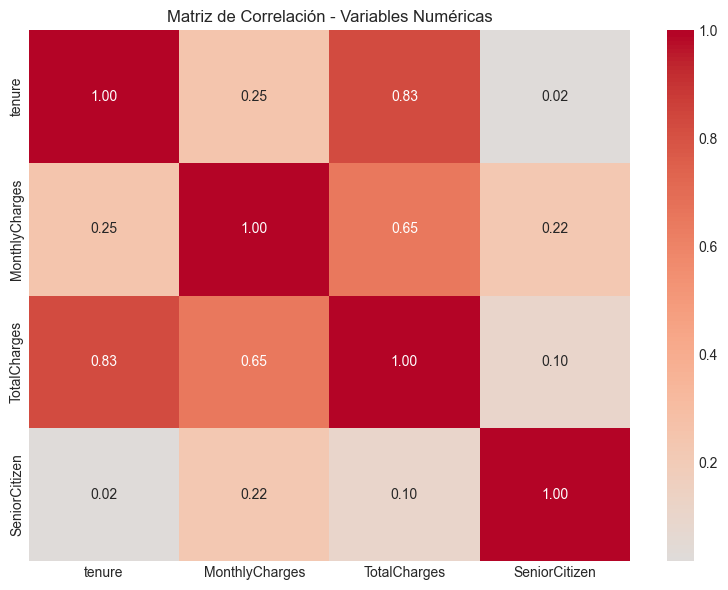

In [11]:
numeric_data = df[numeric_cols + ['SeniorCitizen']]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

Existe una correlación fuerte y positiva entre TotalCharges y tenure (0.83), lo cual es lógico ya que los clientes con mayor antigüedad acumulan más cargos totales. MonthlyCharges muestra una correlación moderada con TotalCharges (0.65), indicando que clientes con mayores cargos mensuales también tienden a tener mayores cargos totales, aunque la antigüedad es un factor más determinante. La correlación débil entre tenure y MonthlyCharges (0.25) sugiere que la antigüedad del cliente no está fuertemente asociada con el nivel de servicio contratado.

### 3.4 Análisis Multivariado - Tasa de Churn por Variables Categóricas

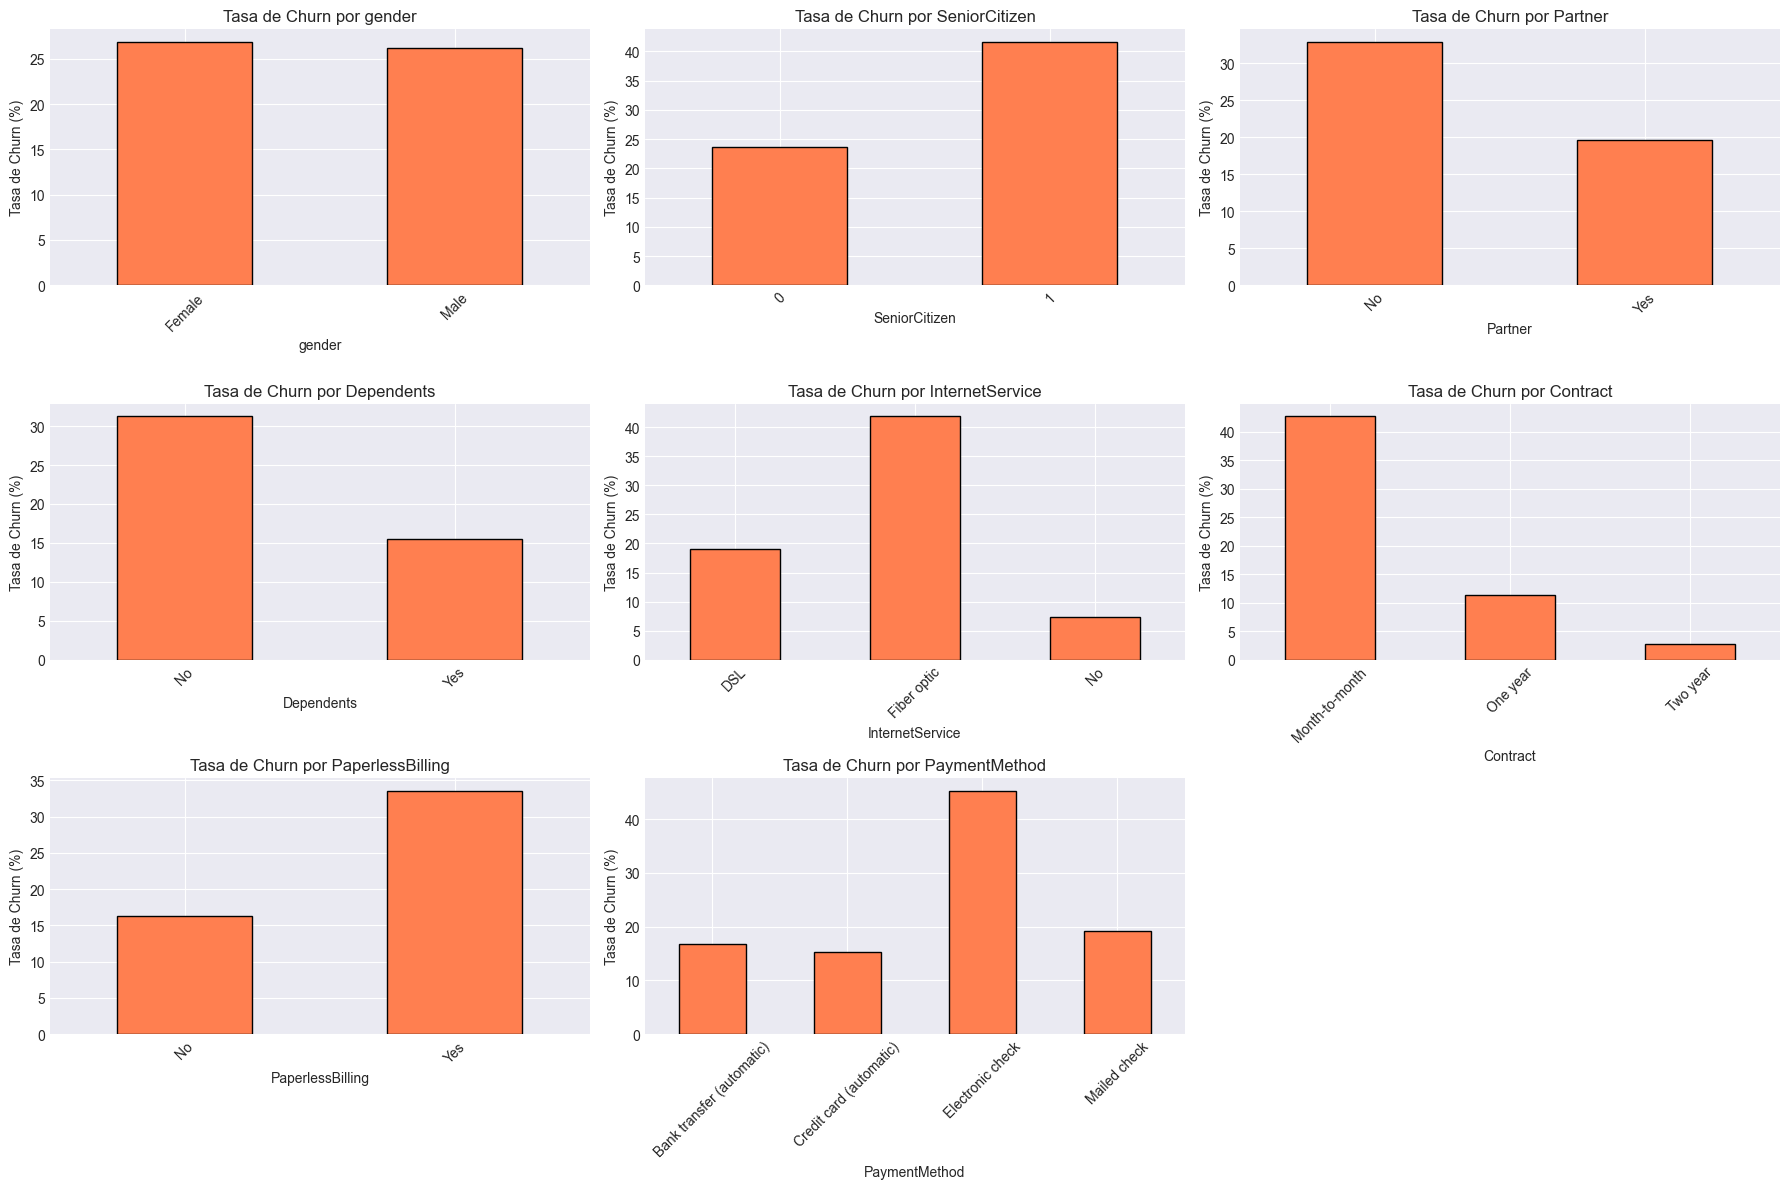

In [12]:
important_categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                         'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

n_cols = 3
n_rows = (len(important_categorical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(important_categorical):
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    churn_rate.plot(kind='bar', ax=axes[i], color='coral', edgecolor='black')
    axes[i].set_title(f'Tasa de Churn por {col}')
    axes[i].set_ylabel('Tasa de Churn (%)')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Estos gráficos revelan qué segmentos de clientes tienen una mayor propensión a abandonar el servicio. Las principales conclusiones son:

*   **Factores de Alto Riesgo de Churn:**
    *   **Tipo de Contrato:** Este es el predictor más fuerte. Los clientes con contratos **mes a mes (`Month-to-month`)** tienen una tasa de abandono dramáticamente alta (superior al 40%), mientras que los clientes con contratos anuales o bianuales son extremadamente leales.
    *   **Servicio de Internet:** Los clientes con **fibra óptica (`Fiber optic`)** muestran una tasa de churn significativamente más alta que los de DSL. Esto podría deberse a problemas de estabilidad, precio o competencia agresiva en este segmento.
    *   **Método de Pago:** El pago con **cheque electrónico (`Electronic check`)** está asociado con una tasa de churn mucho más alta (casi el 45%) en comparación con los métodos de pago automáticos, que fomentan una mayor retención.

*   **Factores de Riesgo Moderado de Churn:**
    *   **Perfil Demográfico:** Los clientes **mayores (`SeniorCitizen`)**, sin **pareja (`Partner`)** y sin **dependientes (`Dependents`)** tienden a abandonar el servicio con mayor frecuencia. Esto sugiere que los clientes con menos ataduras familiares son menos "pegajosos".
    *   **Facturación:** Los clientes que optan por la facturación sin papel (`PaperlessBilling`) tienen una tasa de churn más elevada.

*   **Factores con Poca Influencia:**
    *   **Género:** La tasa de churn es prácticamente idéntica entre hombres y mujeres, lo que indica que el género no es una variable predictiva relevante por sí sola.

### 3.5 Análisis Multivariado - Box Plots de Variables Numéricas vs Churn

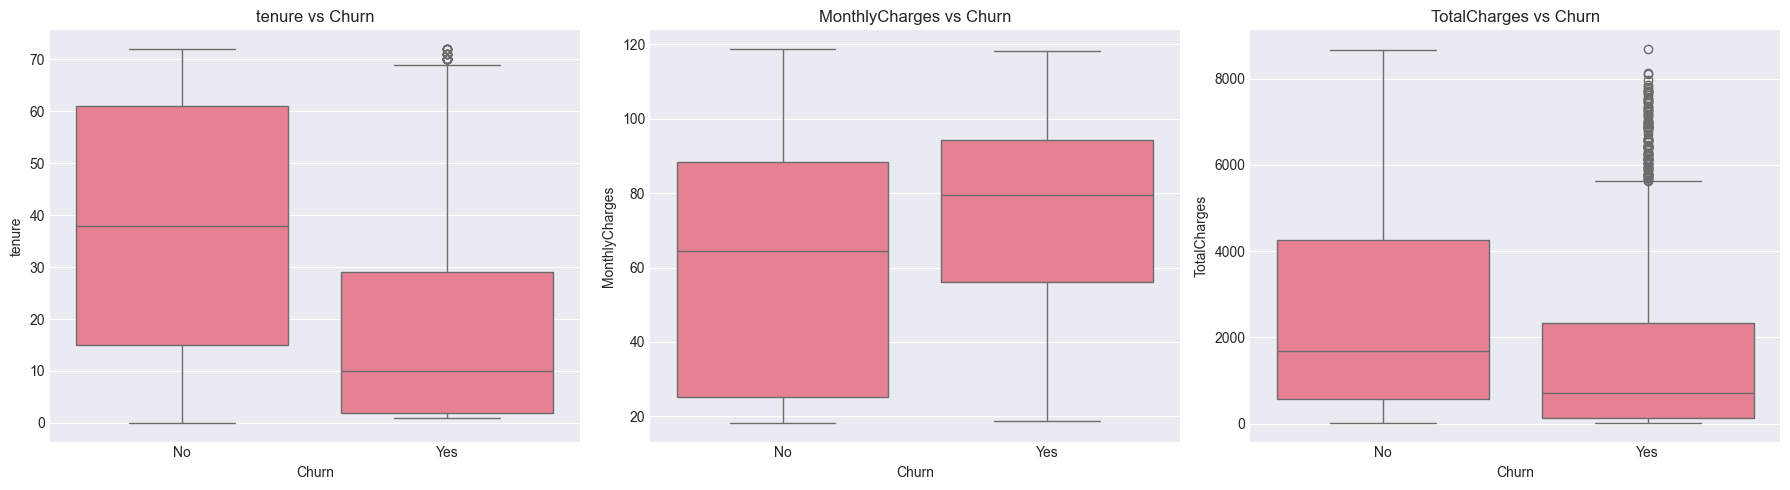

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

La variable tenure (antigüedad) muestra que los clientes con churn tienen una mediana de permanencia significativamente menor, confirmando que los clientes nuevos o con poca antigüedad están en mayor riesgo de abandono. Esto sugiere que los primeros meses son críticos para la retención y requieren intervenciones proactivas.

Los MonthlyCharges son más altos para los clientes que hacen churn, indicando que el precio puede ser un factor importante en la decisión de abandono, especialmente si los clientes perciben que no reciben valor proporcional al costo. Esta observación es crucial para estrategias de pricing y para identificar clientes en riesgo debido a cargos elevados sin servicios compensatorios.

Los TotalCharges muestran una mediana más baja para clientes con churn, lo cual está directamente relacionado con su menor tenure. Los valores atípicos en ambos grupos indican que existe variabilidad considerable, pero la tendencia general confirma que clientes con menor inversión acumulada están más propensos a abandonar.

## 4. Preprocesamiento

In [14]:
df_model = df.drop('customerID', axis=1)

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("\nDistribución de la variable objetivo:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

Shape de X: (7043, 19)
Shape de y: (7043,)

Distribución de la variable objetivo:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


Se eliminó la variable customerID ya que es un identificador único sin valor predictivo. El dataset resultante contiene 19 variables predictoras que capturan información demográfica, de servicios contratados y características de cuenta. La variable objetivo Churn muestra una distribución desbalanceada con aproximadamente 73.5% de clientes que no abandonan y 26.5% que sí lo hacen.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (5634, 19)
Shape de X_test: (1409, 19)
Shape de y_train: (5634,)
Shape de y_test: (1409,)


## 5. Guardado de Artefactos para el Siguiente Notebook

In [ ]:
os.makedirs('../data_processed', exist_ok=True)

print("Directorios creados exitosamente")

Directorios creados exitosamente


In [21]:
X_train.to_csv('../data_processed/X_train.csv', index=False)
X_test.to_csv('../data_processed/X_test.csv', index=False)
y_train.to_csv('../data_processed/y_train.csv', index=False)
y_test.to_csv('../data_processed/y_test.csv', index=False)

print("Datos procesados guardados exitosamente en ../data_processed/")
print("\nArchivos guardados:")
print("- X_train.csv")
print("- X_test.csv")
print("- y_train.csv")
print("- y_test.csv")

Datos procesados guardados exitosamente en ../data_processed/

Archivos guardados:
- X_train.csv
- X_test.csv
- y_train.csv
- y_test.csv
